# A. Ley de Desplazamiento de Wien
La ley de radiación de Planck establece que la intensidad $I$ de la radiación por unidad de área y por
unidad de longitud de onda $\lambda$ de un cuerpo negro con una temperatura $T$ es
$$ I(\lambda) = \frac{2\pi hc\lambda^{-5}}{\exp\left(\frac{hc}{\lambda k_{b}T}\right)-1} $$
donde $h$ es la constante de Planck, $c$ es la rapidez de la luz en el vacio y $k_{B}$ es la constante de Boltzmann.

---
1. Escriba una función que grafique la intensidad $I$ en función de $\lambda$ para una temperatura $T$ dada.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants
import pandas as pd

#des = scipy.constants.find("Name of constant group") ------> Lista con valor de las constantes
#cts=scipy.constants.physical_constants['cts name'] ------> (Valor, unidades, incertidumbre)

#Definición de función de intensidad 
def I(Lam,T):
    ''' Esta función retorna una lista con valores de intensidad, Lam debe ser una lista de valores de
    longitud de onda en nanometros y T un valor entero de al temperatura en Kelvin.'''
    
    #Constante de Planck en kg nm^{2} s^{-1}
    H = scipy.constants.physical_constants['Planck constant']
    h = H[0]*10**18
    
    #Velocidad de la luz en el vacio nm s^{-1}
    C = scipy.constants.physical_constants['speed of light in vacuum']
    c = C[0]*10**9
    
    #Constante de Boltzmann en nm^{2} kg s^{-2} K^{-1}
    K = scipy.constants.physical_constants['Boltzmann constant']
    k = K[0]*10**18
    
    #función principal
    I=[]
    for i in range(0,len(Lam)):
        if Lam[i]==0:
            inten=0
            I.append(inten)
        else :
            x = (h*c) / (Lam[i]*k*T)
            num = 2*np.pi*c*h*Lam[i]**-5
            den = np.exp(x)-1
            inten = num/den
            I.append(inten)
    
    return I

/tmp/ipykernel_10066/2898241890.py:36: RuntimeWarning: overflow encountered in exp
  den = np.exp(x)-1


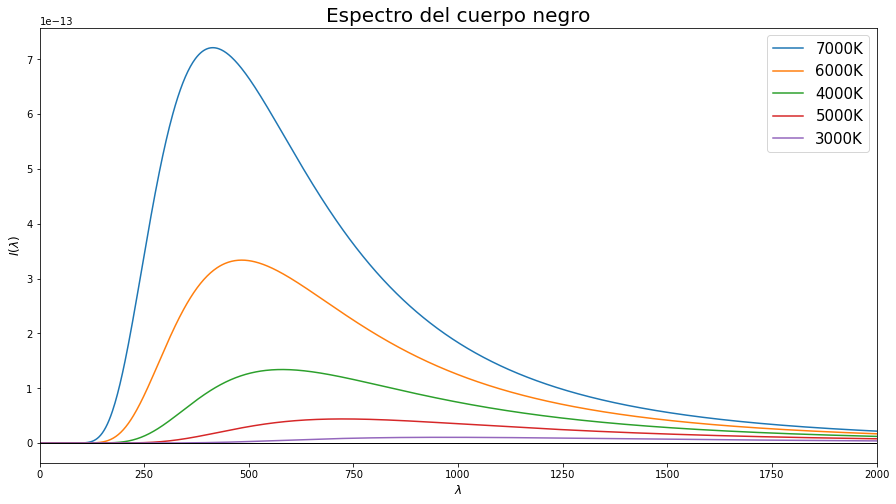

In [3]:
#Calculo de intensidades
Lam=np.linspace(0,2000,1000) #longitud de onda 
In1=I(Lam,7000)
In2=I(Lam,6000)
In3=I(Lam,5000)
In4=I(Lam,4000)
In5=I(Lam,3000)

#Plot de los espectros
plt.figure(figsize=(15,8))
plt.plot(Lam,In1,label='7000K')
plt.plot(Lam,In2,label='6000K')
plt.plot(Lam,In3,label='4000K')
plt.plot(Lam,In4,label='5000K')
plt.plot(Lam,In5,label='3000K')
plt.plot([0,2000], [0,0], color="k", linewidth=1)
plt.legend(fontsize=15)
plt.xlabel(r'$\lambda$',fontsize=12)
plt.xlim(0,2000)
plt.ylabel(r'$I(\lambda)$',fontsize=12)
plt.title('Espectro del cuerpo negro',fontsize=20)
plt.show()

---
2. Utilice la derivada de esta expresión para mostrar que la longitud de onda $\lambda_{m}$ en la que se tiene el máximo de la intensidad satisface la ecuación $$ 5\exp\left(-\frac{hc}{\lambda_{m} k_{b}T}\right)+\frac{hc}{\lambda_{m} k_{b}T}-5=0 $$

Empecemos considerando la derivada parcial con respecto a la longitud de onda de la intensidad $I(\lambda)$, obteniendo entonces

\begin{align}
\frac{\partial}{\partial \lambda} \left( \frac{2\pi hc\lambda^{-5}}{\exp\left(\frac{hc}{\lambda k_{b}T}\right)-1} \right) &= \frac{1}{\left(\exp\left(\frac{hc}{\lambda k_{b}T}\right)-1\right)^{2}} \left[-10 \pi hc\lambda^{-6} \left( \exp\left(\frac{hc}{\lambda k_{b}T}\right)-1\right) +2\pi hc\lambda^{-5} \exp\left(\frac{hc}{\lambda k_{b}T}\right) \frac{hc}{\lambda^2 k_{b}T} \right] \\
&=\frac{2\pi hc \lambda^{-6}}{\left(\exp\left(\frac{hc}{\lambda k_{b}T}\right)-1\right)^{2}}  \left[-5 \left( \exp\left(\frac{hc}{\lambda k_{b}T}\right)-1\right) +\exp\left(\frac{hc}{\lambda k_{b}T}\right) \frac{hc}{\lambda k_{b}T} \right]
\end{align}

Como estamos interesados en el valor de la longitud de onda $\lambda_{m}$ para el cual tenemos un máximo en la intensidad, entonces tendremos que dicho valor corresponde a un punto estacionario de la función, es decir, se debe tener que $I(\lambda_{m})=0$. Por lo tanto, tendremos

\begin{align}
\frac{2\pi hc \lambda_{m}^{-6}}{\left(\exp\left(\frac{hc}{\lambda_{m} k_{b}T}\right)-1\right)^{2}}  \left[-5 \left( \exp\left(\frac{hc}{\lambda_{m} k_{b}T}\right)-1\right) +\exp\left(\frac{hc}{\lambda_{m} k_{b}T}\right) \frac{hc}{\lambda_{m} k_{b}T} \right] &=0\\
5-5\exp\left(\frac{hc}{\lambda_{m} k_{b}T}\right)+\exp\left(\frac{hc}{\lambda_{m} k_{b}T}\right) \frac{hc}{\lambda_{m} k_{b}T} &=0\\
5\exp\left(-\frac{hc}{\lambda_{m} k_{b}T}\right)+\frac{hc}{\lambda_{m} k_{b}T}-5&=0
\end{align}
con lo cual damos por demostrado que la longitud de onda $\lambda_{m}$ en la que se tiene el máximo de la intensidad satisface la ecuación
$$ 5\exp\left(-\frac{hc}{\lambda_{m} k_{b}T}\right)+\frac{hc}{\lambda_{m} k_{b}T}-5=0 $$

---
3. Realice la sustitución $x = \frac{hc}{\lambda_{m }k_{B}T}$  para mostrar que la longitud de onda correspondiente al máximo de intensidad satisface la Ley de Desplazamiento de Wien, $$ \lambda_{m} = \frac{b}{T} $$ donde $b = \frac{hc}{k_{B}x}$ y $x$ es la solución de la ecuación no-lineal $$ 5\exp\left(-x\right)+x-5=0 $$

Consideremos la relación para los $\lambda_{m}$ encontrada en el el punto (2) y consideremos el cambio de variable $x = \frac{hc}{\lambda_{m }k_{B}T}$, de esta forma tendremos que la ecuación en terminos de $x$ sera igual a
\begin{align}
5\exp\left(-\frac{hc}{\lambda_{m} k_{b}T}\right)+\frac{hc}{\lambda_{m} k_{b}T}-5=0 \longrightarrow 5\exp\left(-x\right)+x-5=0 
\end{align}
con $x$ las raices de la ecuación. Ahora para $\lambda_{m}$ tendremos la relación 
$$x = \frac{hc}{\lambda_{m }k_{B}T}$$
$$\lambda_{m}=\frac{hc}{x k_{B}T}$$
$$\lambda_{m}=\frac{b}{T}$$
con $b = \frac{hc}{k_{B}x}$ la constante de wien.

---
4. Escriba un programa que resuelva la ecuación para $x$ con una tolerancia de $\epsilon = 10^{−6}$ utilizando el método de busqueda binaria (bisección) y con ello encuentre el coeficiente $b$ en la ley de desplazamiento.

Empezaremos por definir y analizar la función $ F(x)=5\exp\left(-x\right)+x-5 $

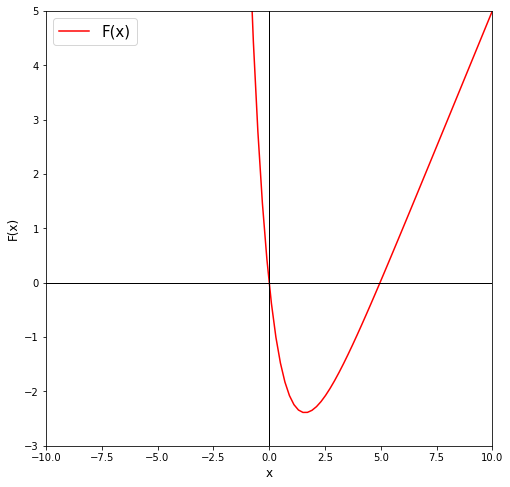

In [4]:
#Definición de la función
F = lambda X1: 5*np.exp(-X1)+X1-5 

#Creación de las listas con 100 datos en el dominio
X=np.linspace(-10,10,100)
Y=F(X)

#Grafico de la función
plt.figure(figsize=(8,8))
plt.plot(X,Y,color='red',label='F(x)')
plt.legend(fontsize=15)
plt.plot([-500,500],[0,0],color='k',linewidth=1)
plt.plot([0,0],[-3,5],color='k',linewidth=1)
plt.xlabel(r'x',fontsize=12)
plt.xlim(-10,10)
plt.ylabel(r'F(x)',fontsize=12)
plt.ylim(-3,5)
plt.show()

Donde los puntos de corte $x_{0}$ seran aquellos que cumplan con la relación $5\exp\left(-x_{0}\right)+x_{0}-5=0$

In [5]:
#Función de interpolación cuadratica en un rango de tres puntos
def quadraticInterpolation(x1, x2, x3, f1, f2, f3, X):
    
    p2 = (((X-x2)*(X-x3))/((x1-x2)*(x1-x3)))*f1 +\
    (((X-x1)*(X-x3))/((x2-x1)*(x2-x3)))*f2 +\
    (((X-x1)*(X-x2))/((x3-x1)*(x3-x2)))*f3
    return p2


#Función de interpolación cuadratica en todo el dominio de puntos
def FinalInterpolation(X,Y):
    BigListY=[]
    BigListX=[]
    for i in range(0,len(Y)-2):
        x_interval = np.linspace(X[i],X[i+1],100000) #Intervalo 
        y_interval = quadraticInterpolation(X[i], X[i+1], X[i+2], Y[i], Y[i+1], Y[i+2], x_interval)
        for j in range(0,len(y_interval)):
            BigListY.append(y_interval[j])
            BigListX.append(x_interval[j])
    return [BigListX,BigListY]

#Función de la tenica de la bisección
def bisec(L):
    cero=[]
    for i in range(0,len(L)):
        if np.abs(L[i]) <= 10**-6 or L[i]==0:
            cero.append((i,L[i]))
        else:
            continue
    return cero

In [19]:
#Cero de la función
Final=FinalInterpolation(X,Y)
YFinal=Final[1]
XFinal=Final[0]
cero=bisec(YFinal)

#Constante de Wien

#Constante de Planck en kg nm^{2} s^{-1}
H = scipy.constants.physical_constants['Planck constant']
h = H[0]*10**18
    
#Velocidad de la luz en el vacio nm s^{-1}
C = scipy.constants.physical_constants['speed of light in vacuum']
c = C[0]*10**9
    
#Constante de Boltzmann en nm^{2} kg s^{-2} K^{-1}
K = scipy.constants.physical_constants['Boltzmann constant']
k = K[0]*10**18
    
x0=XFinal[7407729]
b=(h*c)/(k*x0)*0.001

print('El x que cumple con la ecuación 5exp(-x)+x-5=0 es', x0 )
print('Con lo cual se concluye que la constante de wien tiene un valor de', b,'μm')

El x que cumple con la ecuación 5exp(-x)+x-5=0 es 4.965109247052067
Con lo cual se concluye que la constante de wien tiene un valor de 2897.7748643862737 μm


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


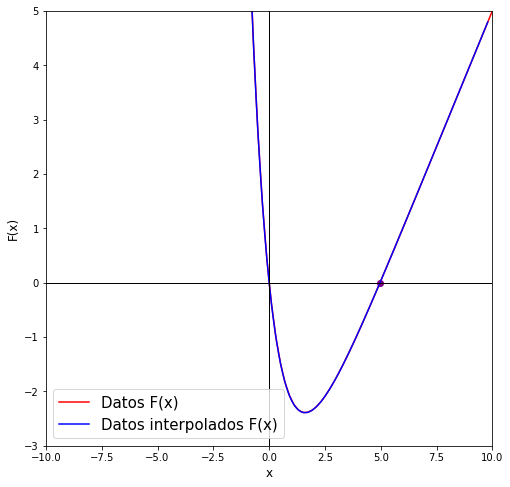

In [91]:
plt.figure(figsize=(8,8))
plt.plot(X,Y,color='red',label='Datos F(x)')
plt.plot(Final[0],Final[1], color='blue', label= 'Datos interpolados F(x)')
plt.scatter(XFinal[7407729],YFinal[7407729],color='purple')
plt.legend(fontsize=15)
plt.plot([-500,500],[0,0],color='k',linewidth=1)
plt.plot([0,0],[-3,5],color='k',linewidth=1)
plt.xlabel(r'x',fontsize=12)
plt.xlim(-10,10)
plt.ylabel(r'F(x)',fontsize=12)
plt.ylim(-3,5)
plt.show()

(2897774.8643862735, 4.965109247052067)
